# **Optimization**

### **Data**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [2]:
california = fetch_california_housing()

df = pd.DataFrame(california.data, columns=california.feature_names)
df['TARGET'] = california.target
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [3]:
scaler = StandardScaler()
scaler.fit(df.values[:, :-1])
df.values[:, :-1] =  scaler.transform(df.values[:, :-1])

df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


---

### **Souce Code**

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

**1. 데이터 준비 및 입출력 데이터 정의**

In [5]:
data = torch.from_numpy(df.values).float()
x = data[:, :-1]
y = data[:, -1:]

**2. 하이퍼 파라미터 정의**

SGD가 아닌 Adam을 사용하므로, 이제는 학습률이 필요없게 되었다.

In [1]:
n_epochs = 4000
print_interval = 200
batch_size=256
#learning_rate = 1e-2

**3. DNN 정의**

In [7]:
model = nn.Sequential(
    nn.Linear(x.size(-1), 6),
    nn.LeakyReLU(),
    nn.Linear(6,5),
    nn.LeakyReLU(),
    nn.Linear(5,4),
    nn.LeakyReLU(),
    nn.Linear(4,3),
    nn.LeakyReLU(),
    nn.Linear(3, y.size(-1)), 
)

print(model)

Sequential(
  (0): Linear(in_features=8, out_features=6, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=6, out_features=5, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=5, out_features=4, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=4, out_features=3, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=3, out_features=1, bias=True)
)


**4. 최적화 알고리즘 설정(SGD)**

In [8]:
optimizer = optim.Adam(model.parameters())

**5. 에폭 루프 설정**

In [9]:
for i in range(n_epochs):
    indices = torch.randperm(x.size(0))
    x_=torch.index_select(x, dim=0, index=indices)
    y_=torch.index_select(y, dim=0, index=indices)

    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)
    
    y_hat = []
    total_loss = 0

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.mse_loss(y_hat_i, y_i)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += float(loss) # type casting into float. to prevent memory leak.
        y_hat += [y_hat_i]

    total_loss = total_loss / len(x_) # mean loss value during 1 epoch

    if(i+1) % print_interval == 0:
        print('Epoch %d/%d: loss=%.4e' %(i+1, n_epochs, total_loss))

y_hat = torch.cat(y_hat, dim=0)
y = torch.cat(y_, dim=0)

C:\Users\user\AppData\Local\Temp\ipykernel_596\3732691660.py:20: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:836.)
  total_loss += float(loss) # type casting into float. to prevent memory leak.


Epoch 200/4000: loss=4.9103e-01
Epoch 400/4000: loss=4.7119e-01
Epoch 600/4000: loss=4.4899e-01
Epoch 800/4000: loss=4.4159e-01
Epoch 1000/4000: loss=4.2861e-01
Epoch 1200/4000: loss=4.2223e-01
Epoch 1400/4000: loss=4.1559e-01
Epoch 1600/4000: loss=4.0554e-01
Epoch 1800/4000: loss=4.0316e-01
Epoch 2000/4000: loss=4.0036e-01
Epoch 2200/4000: loss=3.9677e-01
Epoch 2400/4000: loss=3.8794e-01
Epoch 2600/4000: loss=3.8621e-01
Epoch 2800/4000: loss=3.8372e-01
Epoch 3000/4000: loss=3.8848e-01
Epoch 3200/4000: loss=3.8285e-01
Epoch 3400/4000: loss=3.6864e-01
Epoch 3600/4000: loss=3.6758e-01
Epoch 3800/4000: loss=3.6389e-01
Epoch 4000/4000: loss=3.5887e-01


**6. 시각화**

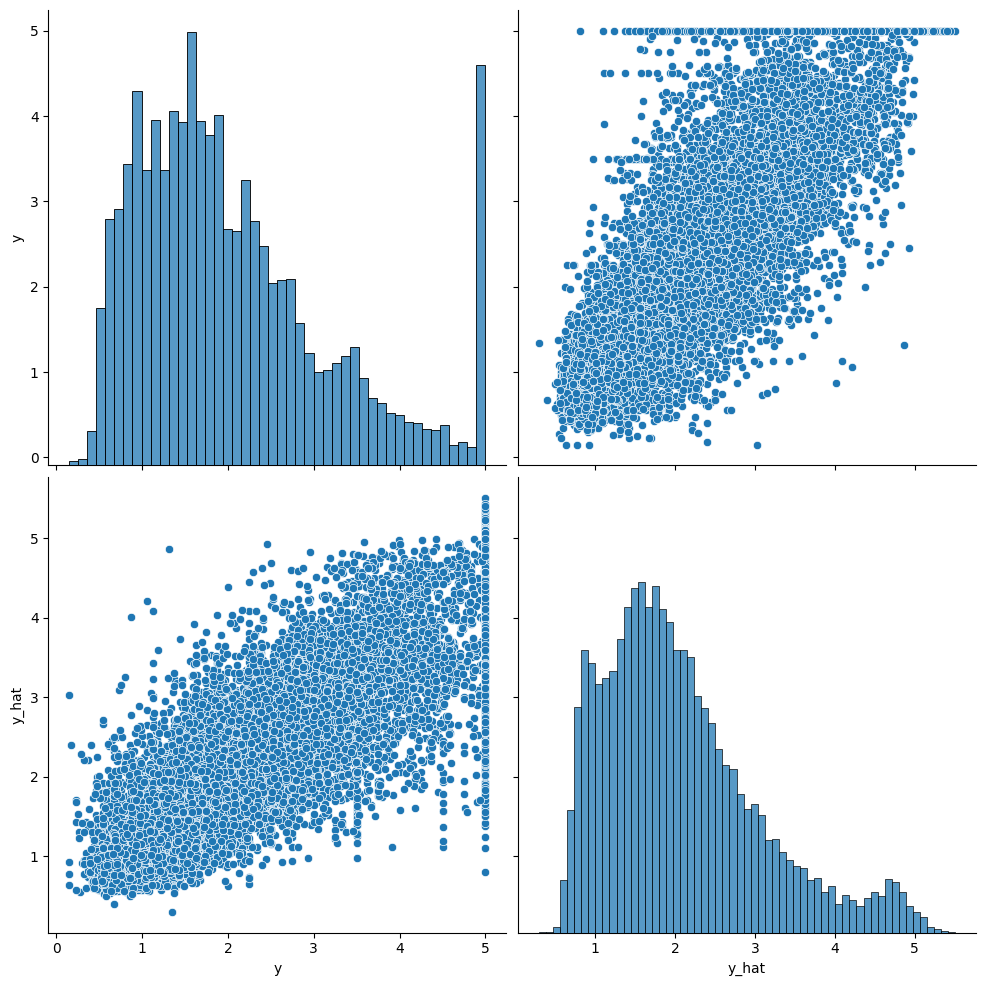

In [10]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(),
                  columns=["y", "y_hat"])
sns.pairplot(df, height=5)
plt.show()